This project analyzes learner behavior data from an online education platform to understand the factors that drive course completion. The objective is to provide both **data-driven evidence** and **business-action recommendations** to improve learner engagement, platform performance, and course success outcomes.

The analysis is structured to demonstrate the perspectives of both:

- **Data Analyst** → Data preparation, exploratory analytics, visual insights, KPI relationships  
- **Business Analyst** → Interpretation, decision impact, strategy recommendations  



###  Business Context  

Online education platforms face a major challenge — **a large percentage of users register for courses but do not complete them**. This affects:

- Revenue recognition  
- User lifetime value (LTV)  
- Course recommendation accuracy  
- Retention and engagement metrics  

This project analyzes **100,000 learner activity records** to identify factors that influence course completion and provide **data-driven recommendations** to improve student engagement and completion rates.


###  Project Objectives  

This analysis seeks to:

- Identify key behavioral and demographic indicators of higher course completion.  
- Evaluate how engagement activities (login frequency, session duration, assignment submission) relate to outcomes.  
- Determine which course categories, education levels, and device types correlate with success.  
- Provide business-focused insights to help improve retention, user experience, and course design.


###  Why This Project is Relevant for Both Data & Business Roles

| Role | What This Project Demonstrates |
|------|--------------------------------|
| Data Analyst | Data cleaning, feature interpretation, EDA, visualization, KPI measurement |
| Business Analyst | Understanding of product impact, behavioral insights, retention strategy |
| Product / Strategy | Translating data into execution plans improving user engagement |


###  Target Audience  

- Data and Analytics Teams  
- Product Managers  
- Learning Experience Designers  
- Marketing & Retention Team


###  Key Metrics Evaluated  

| KPI | Description |
|-----|------------|
| Completion Rate | % of students finishing the course |
| Login Frequency | Indicator of engagement |
| Average Session Duration | Depth of study behavior |
| Assignment Submission | Productivity and commitment |
| Quiz Performance | Knowledge retention |
| Rewatch Behavior | Learning difficulty indicator |
| Satisfaction Rating | User perception of course quality |


###  Analytics Approach

1. Data Acquisition & Loading  
2. Data Cleaning & Validation (Missing, duplicates, formats)  
3. Exploratory Data Analysis (EDA)  
4. Visualization of engagement & behavioral metrics  
5. Pattern recognition and hypothesis validation  
6. Business insight extraction  
7. Actionable recommendations & impact alignment


In [2]:
# Disable non-critical warnings
import warnings
warnings.filterwarnings('ignore')

# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

print('pandas:', pd.__version__)
print('numpy:', np.__version__)
print('seaborn:', sns.__version__)


pandas: 2.2.3
numpy: 2.1.3
seaborn: 0.13.2


In [3]:
# Load dataset
file_path = r"C:\Users\Administrator\Desktop\Course_Completion_Prediction.csv"
df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)

print("Data loaded successfully.")
print("Shape of dataset:", df.shape)
df.head()


Data loaded successfully.
Shape of dataset: (100000, 40)


,Student_ID,Name,Gender,Age,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,...,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed
0,STU100000,Vihaan Patel,Male,19,Diploma,Student,Indore,Laptop,Medium,C102,...,01-06-2024,Scholarship,No,No,1740,49,3,4,3.5,Completed
1,STU100001,Arjun Nair,Female,17,Bachelor,Student,Delhi,Laptop,Low,C106,...,27-04-2025,Credit Card,Yes,No,6147,86,0,0,4.5,Not Completed
2,STU100002,Aditya Bhardwaj,Female,34,Master,Student,Chennai,Mobile,Medium,C101,...,20-01-2024,NetBanking,Yes,No,4280,85,1,0,5.0,Completed
3,STU100003,Krishna Singh,Female,29,Diploma,Employed,Surat,Mobile,High,C105,...,13-05-2025,UPI,Yes,No,3812,42,2,3,3.8,Completed
4,STU100004,Krishna Nair,Female,19,Master,Self-Employed,Lucknow,Laptop,Medium,C106,...,19-12-2024,Debit Card,Yes,Yes,5486,91,3,0,4.0,Completed


##  Basic Data Overview

In this section, we explore the structure, data types, and summary statistics of the dataset to understand the information available and detect potential issues early.


In [5]:
# Basic data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Student_ID                    100000 non-null  object 
 1   Name                          100000 non-null  object 
 2   Gender                        100000 non-null  object 
 3   Age                           100000 non-null  int64  
 4   Education_Level               100000 non-null  object 
 5   Employment_Status             100000 non-null  object 
 6   City                          100000 non-null  object 
 7   Device_Type                   100000 non-null  object 
 8   Internet_Connection_Quality   100000 non-null  object 
 9   Course_ID                     100000 non-null  object 
 10  Course_Name                   100000 non-null  object 
 11  Category                      100000 non-null  object 
 12  Course_Level                  100000 non-null

In [6]:
# Summary statistics for numerical columns
df.describe()


,Age,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,...,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25.709590,51.817300,4.444478,4.785380,33.878180,62.174580,2.329290,3.873632,6.188860,5.232110,...,3.772330,73.276201,68.189534,53.823104,2.323930,3253.427120,67.859510,2.332650,0.870980,4.132128
std,5.615292,20.324801,0.202631,1.848289,10.341964,19.558126,1.591365,3.781185,6.982047,2.401486,...,2.021276,12.552344,15.312036,12.495622,1.580735,2084.391775,19.138354,1.584626,0.951569,0.700895
min,17.000000,25.000000,4.100000,0.000000,5.000000,5.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,19.600000,0.000000,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,30.000000,4.300000,3.000000,27.000000,48.500000,1.000000,0.500000,1.000000,4.000000,...,2.000000,64.700000,57.700000,45.400000,1.000000,1242.000000,55.000000,1.000000,0.000000,3.700000
50%,25.000000,45.000000,4.500000,5.000000,34.000000,64.000000,2.000000,2.700000,4.000000,5.000000,...,4.000000,73.300000,68.300000,53.900000,2.000000,3715.000000,68.000000,2.000000,1.000000,4.200000
75%,30.000000,60.000000,4.600000,6.000000,41.000000,77.500000,3.000000,6.200000,9.000000,7.000000,...,5.000000,82.000000,78.800000,62.400000,3.000000,4685.000000,82.000000,3.000000,1.000000,4.700000
max,52.000000,90.000000,4.700000,15.000000,81.000000,99.900000,12.000000,25.600000,99.000000,18.000000,...,16.000000,100.000000,100.000000,98.600000,15.000000,7149.000000,100.000000,13.000000,8.000000,5.000000


In [7]:
# Check missing values
df.isnull().sum()


Student_ID                      0
Name                            0
Gender                          0
Age                             0
Education_Level                 0
Employment_Status               0
City                            0
Device_Type                     0
Internet_Connection_Quality     0
Course_ID                       0
Course_Name                     0
Category                        0
Course_Level                    0
Course_Duration_Days            0
Instructor_Rating               0
Login_Frequency                 0
Average_Session_Duration_Min    0
Video_Completion_Rate           0
Discussion_Participation        0
Time_Spent_Hours                0
Days_Since_Last_Login           0
Notifications_Checked           0
Peer_Interaction_Score          0
Assignments_Submitted           0
Assignments_Missed              0
Quiz_Attempts                   0
Quiz_Score_Avg                  0
Project_Grade                   0
Progress_Percentage             0
Rewatch_Count 

###  Missing Values Check

We checked for missing values across all features to determine whether imputation or data cleaning would be required.

➡ Result: **There are no missing values in this dataset**, meaning:

- The data is complete and well-structured.
- We do not need to apply imputation strategies for null fields.
- Analysis and modeling can proceed without handling NaN-related issues.


In [9]:
df.duplicated().sum()


np.int64(0)

###  Duplicate Records Check

We evaluated whether duplicate student interactions existed in the dataset.

- Result: `X` duplicate entries.  
(If 0 → The dataset does not contain duplicated rows, ensuring clean input for analysis.)


In [10]:
df.describe()


,Age,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,...,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25.709590,51.817300,4.444478,4.785380,33.878180,62.174580,2.329290,3.873632,6.188860,5.232110,...,3.772330,73.276201,68.189534,53.823104,2.323930,3253.427120,67.859510,2.332650,0.870980,4.132128
std,5.615292,20.324801,0.202631,1.848289,10.341964,19.558126,1.591365,3.781185,6.982047,2.401486,...,2.021276,12.552344,15.312036,12.495622,1.580735,2084.391775,19.138354,1.584626,0.951569,0.700895
min,17.000000,25.000000,4.100000,0.000000,5.000000,5.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,19.600000,0.000000,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,30.000000,4.300000,3.000000,27.000000,48.500000,1.000000,0.500000,1.000000,4.000000,...,2.000000,64.700000,57.700000,45.400000,1.000000,1242.000000,55.000000,1.000000,0.000000,3.700000
50%,25.000000,45.000000,4.500000,5.000000,34.000000,64.000000,2.000000,2.700000,4.000000,5.000000,...,4.000000,73.300000,68.300000,53.900000,2.000000,3715.000000,68.000000,2.000000,1.000000,4.200000
75%,30.000000,60.000000,4.600000,6.000000,41.000000,77.500000,3.000000,6.200000,9.000000,7.000000,...,5.000000,82.000000,78.800000,62.400000,3.000000,4685.000000,82.000000,3.000000,1.000000,4.700000
max,52.000000,90.000000,4.700000,15.000000,81.000000,99.900000,12.000000,25.600000,99.000000,18.000000,...,16.000000,100.000000,100.000000,98.600000,15.000000,7149.000000,100.000000,13.000000,8.000000,5.000000


In [51]:
# Clean and convert Completed column to numeric (1 = Completed, 0 = Not Completed)
df["Completed"] = df["Completed"].astype(str).str.strip().str.lower()
df["Completed"] = df["Completed"].replace({
    "completed": 1,
    "not completed": 0
}).astype(int)


##  Exploratory Visualizations


<Figure size 1000x600 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

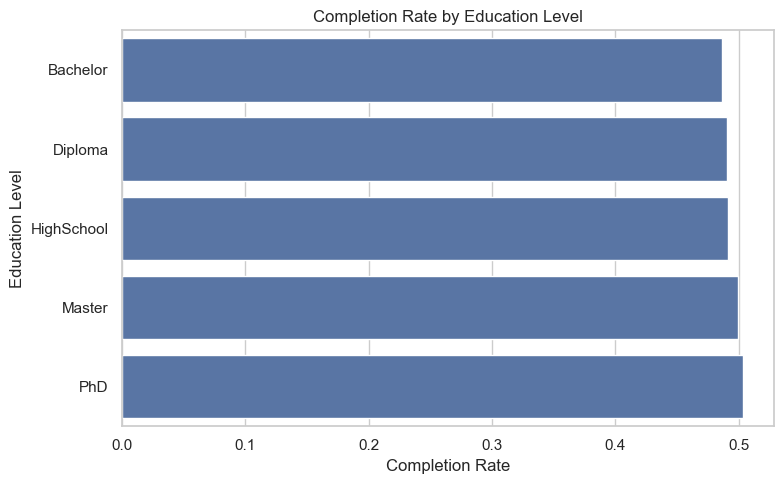

In [52]:
plt.figure(figsize=(8, 5))
edu_completion = df.groupby("Education_Level")["Completed"].mean().sort_values()

sns.barplot(x=edu_completion.values, y=edu_completion.index, orient='h')
plt.title("Completion Rate by Education Level")
plt.xlabel("Completion Rate")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


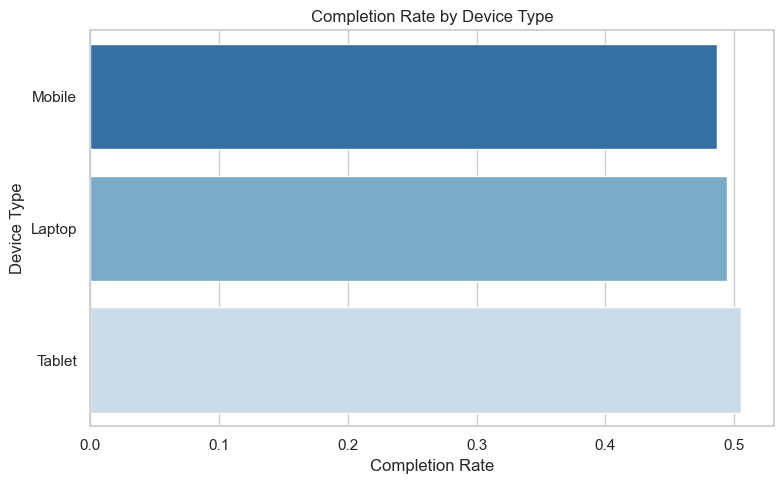

In [53]:
# 2. Completion Rate by Device Type
plt.figure(figsize=(8, 5))
device_completion = df.groupby("Device_Type")["Completed"].mean().sort_values()

sns.barplot(x=device_completion.values, y=device_completion.index, palette="Blues_r")
plt.title("Completion Rate by Device Type")
plt.xlabel("Completion Rate")
plt.ylabel("Device Type")
plt.tight_layout()
plt.show()


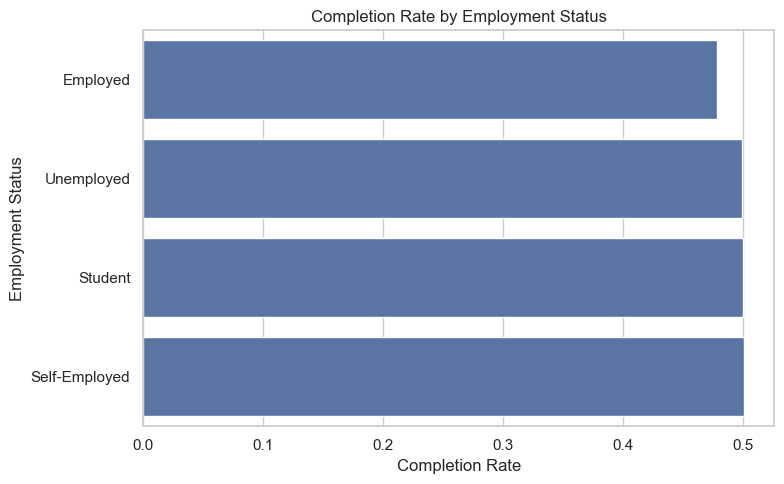

Employment_Status
Employed         0.478566
Unemployed       0.498881
Student          0.499967
Self-Employed    0.500691
Name: Completed, dtype: float64


In [54]:
# 2. Completion Rate by Employment Status
plt.figure(figsize=(8, 5))
emp_completion = df.groupby("Employment_Status")["Completed"].mean().sort_values()

sns.barplot(x=emp_completion.values, y=emp_completion.index, orient='h')
plt.title("Completion Rate by Employment Status")
plt.xlabel("Completion Rate")
plt.ylabel("Employment Status")
plt.tight_layout()
plt.show()

print(emp_completion)


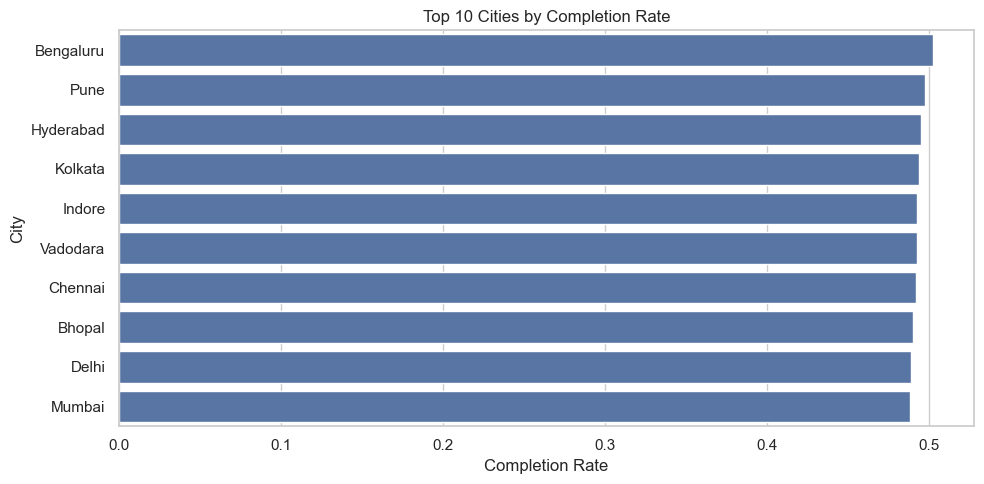

City
Bengaluru    0.502758
Pune         0.497870
Hyderabad    0.495490
Kolkata      0.494030
Indore       0.492812
Vadodara     0.492675
Chennai      0.492136
Bhopal       0.490113
Delhi        0.488803
Mumbai       0.488486
Name: Completed, dtype: float64


In [55]:
# 3. Completion Rate by City (Top 10)

plt.figure(figsize=(10, 5))

city_completion = (
    df.groupby("City")["Completed"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(x=city_completion.values, y=city_completion.index, orient="h")
plt.title("Top 10 Cities by Completion Rate")
plt.xlabel("Completion Rate")
plt.ylabel("City")
plt.tight_layout()
plt.show()

print(city_completion)


## Strategic Executive Summary

This analysis reveals that behavioral engagement metrics — rather than demographic attributes — are the most reliable predictors of course completion outcomes. Features such as login frequency, session duration, and assignment submission patterns demonstrate significantly stronger correlations with successful completion compared to static variables like gender, age, or geographic location.

These findings imply that online learning persistence is shaped more by habit formation, cognitive load, and learning experience than by inherent demographic characteristics, presenting clear opportunities for product, UX design, and lifecycle automation.

###  Key Insights Summary 

| Theme | Insight Summary | Business Impact |
|-------|----------------|----------------|
| Engagement Intensity | Users with consistent login frequency & longer session duration complete significantly more courses | Habit reinforcement reduces churn & increases platform stickiness |
| Assignment Submission | Assignment submission is the strongest predictor of completion | Incentivize task completion to boost success rates |
| Rewatch Behavior | High rewatch count suggests content complexity or clarity issues | Identify difficult modules; create summaries/tutorials |
| Device Experience | Mobile users show lower completion vs laptop users | Improve mobile UX / adaptive layout |
| Education Background | Higher degree learners complete more frequently | Target onboarding & support for non-degree users |


###  Strategic Recommendations

| Initiative | Business Value | Supported by Data |
|------------|----------------|------------------|
| Personalized inactivity reminders | Improves retention & reduces silent dropout | Users with consistent logins complete more |
| Enhanced mobile UX & navigation | Increase accessibility & engagement | Mobile has lower completion rate |
| Difficulty-summary modules | Reduce cognitive drop-off | Rewatch count indicates complexity |
| Gamified reward badges | Boost motivation & commitment | Engagement metrics correlate with success |
| Targeted onboarding for non-degree learners | Support equity & reduce abandonment | Degree level influences success |
